In [2]:
import pandas as pd
import requests
import json
import config
import gmaps
import scipy.stats as st
from pprint import pprint
from config import openWeatherKey
from THconfig import g_key
import matplotlib.pyplot as plt
from scipy import stats
# from api_keys import g_key
# gmaps.configure(api_key=g_key)

ModuleNotFoundError: No module named 'config'

In [3]:
#Pulling data from csv files and creating dataframe with disaster data
coordinates_csv = "output_data/NEW_coordinates.csv"
weatherDisasterCSV = "Resources/disaster_data.csv"
disaster_df = pd.read_csv(weatherDisasterCSV)
#desiredColumns = ["Dis No", "Year", "Seq", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", "Disaster Subsubtype", "Entry Criteria", "ISO", "Location", "Start Month", "End Month", "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "CPI"]
#disaster_df = disaster_df.loc[disaster_df["ISO"] == "USA", desiredColumns]
#disaster_df

In [4]:
#Reading coordinates csv file and creating new dataframe
coordinates_location_df = pd.read_csv(coordinates_csv)
clean_coordinates_index = coordinates_location_df.index
coordinates_location_df = coordinates_location_df.loc[:, ["Location", "Dis No", "Lat", "Long"]]
coordinates_nw_df = coordinates_location_df.loc[(coordinates_location_df["Long"]<-110) & (coordinates_location_df["Lat"]>40)]
#coordinates_nw_df

In [5]:
#I need to create a new dataframe combining the new combine quintant coordinates and the weather disaster data
combined_data_nw_df = pd.merge(coordinates_nw_df, disaster_df, on = "Dis No", how="left").rename(columns={"Location_x": "Location"})
#combined_data_nw_df

In [6]:
#combined_data_nw_df["Disaster Type"].unique()

In [7]:
#Creating a trimmed DF of dropped duplicates for more accurate calculations
trimmed_nw_df = combined_data_nw_df.drop_duplicates(subset= "Dis No", keep="first")
#trimmed_nw_df

In [8]:
#Filtering, grouping and changing the names of columns for yearly analysis
Yearly_TotalsRaw = trimmed_nw_df.groupby("Year").sum()
desiredColumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
Yearly_Totals = Yearly_TotalsRaw.loc[:, desiredColumns].reset_index(drop=False)
Yearly_Totals.rename(columns={"Insured Damages ('000 US$)" : "Insured Damages", "Total Damages ('000 US$)" : "Total Damages"}, inplace=True)
Yearly_CountRaw = trimmed_nw_df.groupby("Year").count()
Yearly_Count = Yearly_CountRaw.loc[:, "Dis No"].reset_index(drop=False)
YearlyMerged = pd.merge(Yearly_Count, Yearly_Totals, on='Year')
#YearlyMerged

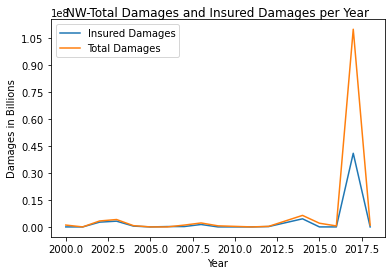

In [9]:
# Total Damages and Insured Damages per Year
import matplotlib.pyplot as plt
PlotThis = ["Insured Damages","Total Damages"]
df = YearlyMerged
Damages = df.plot(kind="line",x="Year",y=PlotThis)
Damages.xaxis.set_major_locator(plt.MaxNLocator(8))
Damages.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.ylabel('Damages in Billions')  
  
# displaying the title 
plt.title(label='NW-Total Damages and Insured Damages per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/NW-Line-TotalDamagesInsuredDamages.png")

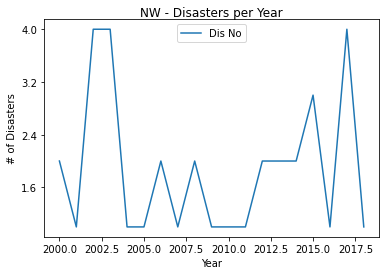

In [10]:
# Disasters per Year
PlotThis = ["Dis No"]
df = YearlyMerged
Homeless = df.plot(kind="line",x="Year",y=PlotThis)
Homeless.xaxis.set_major_locator(plt.MaxNLocator(8))
Homeless.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylabel('# of Disasters')  
  
# displaying the title 
plt.title(label='NW - Disasters per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/NW-Line-DisasterNumber.png")

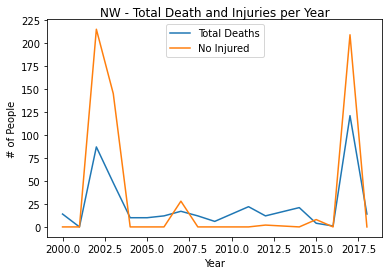

In [11]:
# Total Death and Injuries per Year
PlotThis = ["Total Deaths", "No Injured"]
df = YearlyMerged
DeathInjury = df.plot(kind="line",x="Year",y=PlotThis)
DeathInjury.xaxis.set_major_locator(plt.MaxNLocator(8))
DeathInjury.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='NW - Total Death and Injuries per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/NW-Line-InjuriesAndDeath.png")

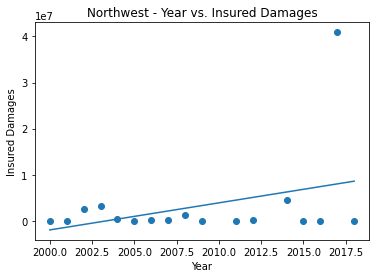

<Figure size 432x288 with 0 Axes>

In [12]:
#Linear regression of Insured Damages as a function of years
from scipy.stats import linregress
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["Insured Damages"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Insured Damages")
plt.title("Northwest - Year vs. Insured Damages")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["Insured Damages"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalInsuredDamages.png")

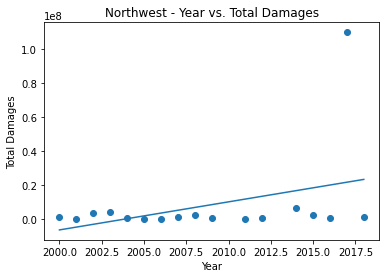

<Figure size 432x288 with 0 Axes>

In [13]:
#Linear regression of total deaths as a function of years
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["Total Damages"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Total Damages")
plt.title("Northwest - Year vs. Total Damages")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["Total Damages"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalDamages.png")

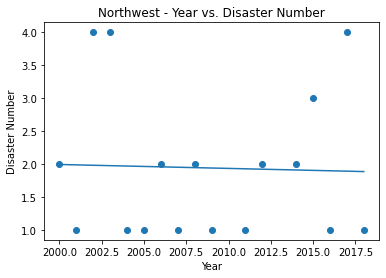

<Figure size 432x288 with 0 Axes>

In [14]:
#Linear regression of disaster number as a function of years
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["Dis No"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Disaster Number")
plt.title("Northwest - Year vs. Disaster Number")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["Dis No"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalDiaster.png")

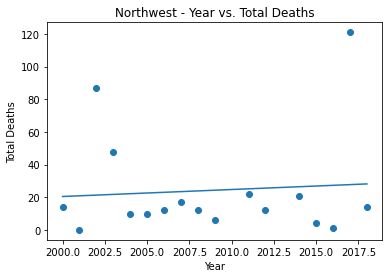

<Figure size 432x288 with 0 Axes>

In [15]:
#Linear regression of total deaths as a function of years
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["Total Deaths"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Northwest - Year vs. Total Deaths")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["Total Deaths"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalDeaths.png")

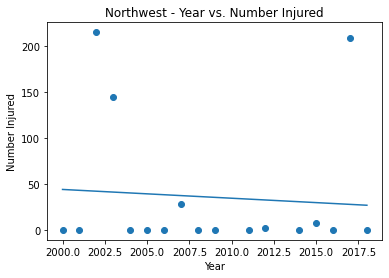

<Figure size 432x288 with 0 Axes>

In [16]:
#Linear regression of total deaths as a function of years
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["No Injured"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Number Injured")
plt.title("Northwest - Year vs. Number Injured")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["No Injured"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalInjured.png")

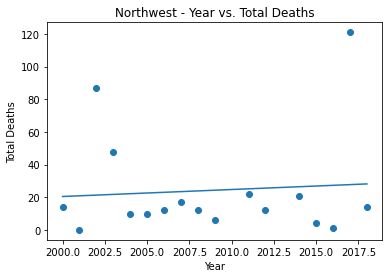

<Figure size 432x288 with 0 Axes>

In [17]:
#Linear regression of total deaths as a function of years
(slope,intercept,rvalue,pvalue,stderr) = linregress(YearlyMerged["Year"], YearlyMerged["Total Deaths"])
x = YearlyMerged["Year"]
regressvalues = slope*x+intercept
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Northwest - Year vs. Total Deaths")
plt.plot(x,regressvalues)
plt.scatter(x,YearlyMerged["Total Deaths"])
plt.show()
plt.savefig("output-graphs/NW-LinRegress-TotalDeaths.png")

Text(0, 0.5, 'Occurence Count')

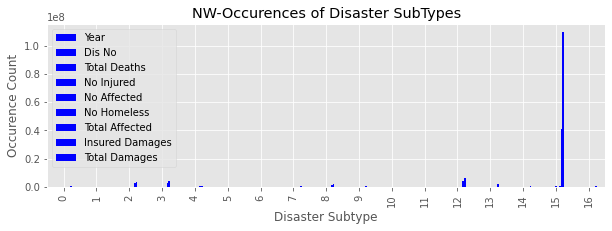

In [44]:
YearlyMerged.plot(kind="bar", figsize=(10,3), facecolor="blue", rot=90)
plt.style.use('ggplot')
plt.title("NW-Occurences of Disaster SubTypes")
plt.xlabel("Disaster Subtype")
plt.ylabel("Occurence Count")

<Figure size 720x720 with 0 Axes>

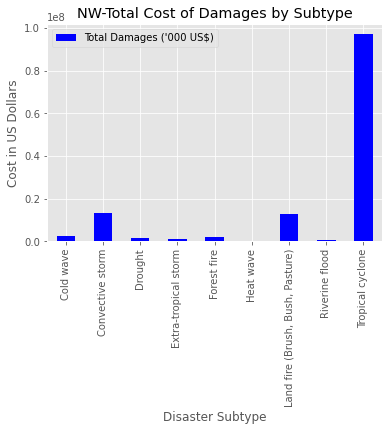

In [45]:
#Total damages by subtype
regionalDisGroupby1 = trimmed_nw_df.groupby("Disaster Subtype").agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})
plt.figure(figsize=(10,10))
regionalDisGroupby1.plot(kind="bar", facecolor="blue", y="Total Damages ('000 US$)", rot=90)
plt.title("NW-Total Cost of Damages by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Cost in US Dollars")
plt.savefig("output-graphs/NW-Bar-DamageCost.png")

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Cold wave to Tropical cyclone
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No Homeless     9 non-null      float64
 1   Total Deaths    9 non-null      float64
 2   No Affected     9 non-null      float64
 3   Total Affected  9 non-null      float64
dtypes: float64(4)
memory usage: 360.0+ bytes


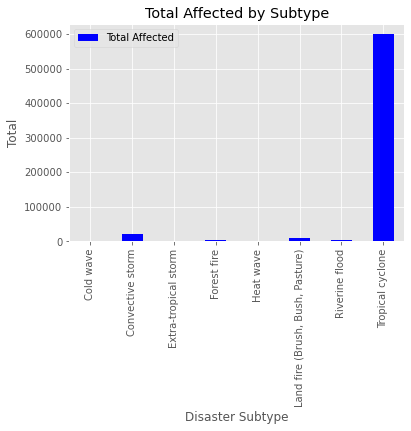

In [46]:
#Total Affected by Subtype
regionalDisGroupbyNoAff = trimmed_nw_df.groupby(["Disaster Subtype"]).agg({"No Homeless": "sum", "Total Deaths": "sum", "No Affected": "sum","Total Affected": "sum"})
regionalDisGroupbyNoAff.info()
regionalDisGroupbyNoAff = regionalDisGroupbyNoAff.drop(index="Drought")
regionalDisGroupbyNoAff
regionalDisGroupbyNoAff.plot.bar(use_index=True, y="Total Affected", rot=90, stacked=True, color={"blue": "Total Affected"})
plt.title("Total Affected by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Total")
plt.savefig("output-graphs/NW-Bar-TotalAffected.png")

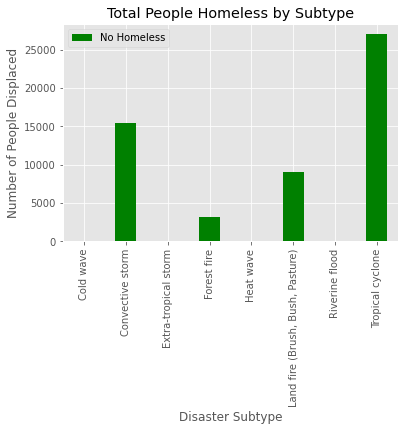

In [47]:
#Total people homeless by subtype
regionalDisGroupbyNoAff.plot.bar(use_index=True, y="No Homeless", rot=90, stacked=True, color={"green": "No Homeless"})
plt.title("Total People Homeless by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of People Displaced")
plt
plt.savefig("output-graphs/NW-Bar-TotalHomeless.png")

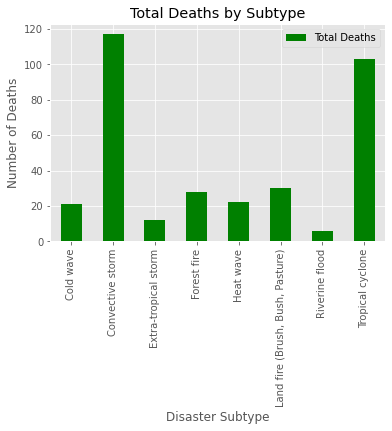

In [48]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y="Total Deaths", rot=90, stacked=True, color={"green": "Total Deaths"})
plt.title("Total Deaths by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of Deaths")
plt.savefig("output-graphs/NW-Bar-TotalDeaths.png")

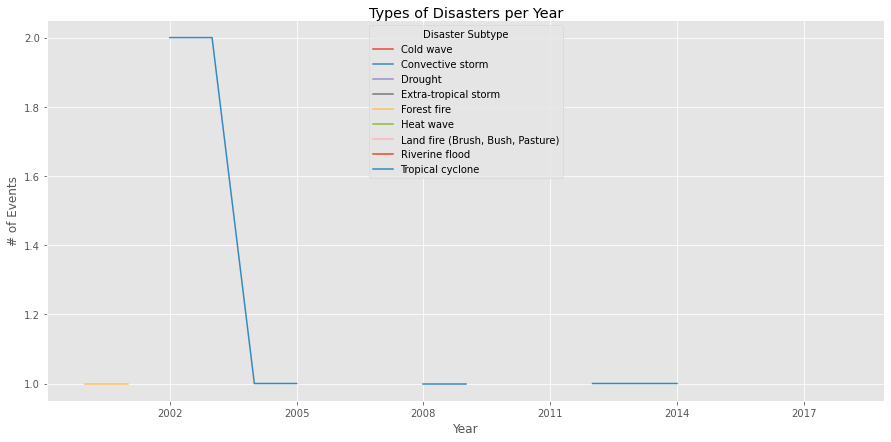

In [23]:
# Types of Disasters by Year
Types =  pd.DataFrame(trimmed_nw_df.groupby('Year')['Disaster Subtype'].value_counts())
df = Types
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
trimmed_nw_df.groupby('Year')['Disaster Subtype'].value_counts().unstack().plot(ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))
plt.ylabel('# of Events')
# displaying the title
plt.title(label='Types of Disasters per Year',
          fontweight=10,
          pad='2.0')
plt.savefig("output-graphs/NWYearlyDisCountByYear.png")

In [ ]:
#HEAT MAP

In [ ]:
#I've put the dependencies down here because they aren't recognized at the top for some reason
import config
import gmaps
from config import openWeatherKey
from THconfig import g_key
gmaps.configure(api_key=g_key)

In [ ]:
#Creating variables for heat map
nw_locations = trimmed_nw_df[["Lat", "Long"]]
damages = trimmed_nw_df["Total Damages ('000 US$)"].astype(float)

In [ ]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(nw_locations, weights = damages, dissipating=False, max_intensity=2000000,
                                 point_radius=1)

fig.add_layer(heat_layer)

fig

In [ ]:
trimmed_year_df = trimmed_nw_df.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df
maxdamage_latlong_df = pd.merge(trimmed_year_df,trimmed_nw_df, on=["Year","Total Damages ('000 US$)"], how="left")
maxdamage_latlong_df = maxdamage_latlong_df[["Year","Total Damages ('000 US$)","Location","Dis No","Lat","Long"]]
maxdamage_latlong_df

In [ ]:
locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])

In [ ]:
# Using the template add the hotel marks to the heatmap
info_box_content = """
<dt>Year</dt><dd>{Year}</dd>
<dt>Disaster Number</dt><dd>{Dis No}</dd>
<dt>Total Damages</dt><dd>{Total Damages ('000 US$)}</dd>
</dl>
"""
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
locations1 = maxdamage_latlong_df[["Lat", "Long"]]


#Add marker to heat map
markers = gmaps.marker_layer(locations1,info_box_content=year_info)
fig.add_layer(markers)

fig